# Classical AB Testing

In [1]:
#Importing Libraries
import sys
import os
import dvc.api
import numpy as np
import scipy.stats as stats 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Defining our Experiment

Ho(null hypothesis): users who saw the smart Ad(treated users) don't show any difference
                    in responding to the Bio to the ones who were shown the dummy Ad 
H1(Alternative hypothesis): exposed users are more responsive to the BIO than the ones shown the dummy Ad


#to see which of the group respond better we have to use the two tailed test
    #let P0 is conversion rate of the controled users and
    #let p is conversion rate of the exposed users
#so for Ho- p0=p
        H1- p0<p
               
and defining a confidence level of 95%,the acceptable value of type I error α= (1-0.95)=0.05
                
    setting statistical power to 80%, so beta B(Beta) = 0.2 or 20%
    

In [10]:
#getting clean data from output of data exploration
combined_df= pd.read_csv('../data/Clean_Ab_Hypothesis_Testing.csv')

In [11]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243 entries, 0 to 1242
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   1243 non-null   object
 1   experiment   1243 non-null   object
 2   date         1243 non-null   object
 3   hour         1243 non-null   int64 
 4   device_make  1243 non-null   object
 5   platform_os  1243 non-null   int64 
 6   browser      1243 non-null   object
 7   response     1243 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 77.8+ KB


# Identifing Conversion Rates

In [22]:
sys.path.append(os.path.abspath(os.path.join('data')))
sys.path.insert(0,'../Scripts/')

In [64]:
from classic_ab import classics
from Graphs import draw

In [65]:
conversion_rates = classics.get_conversion_rates(combined_df, grouping_column='experiment',calculation_column='response')
conversion_rates

,conversion_rate,std_deviation,std_error
experiment,,,
control,0.450512,0.497545,0.020553
exposed,0.468798,0.499025,0.019469


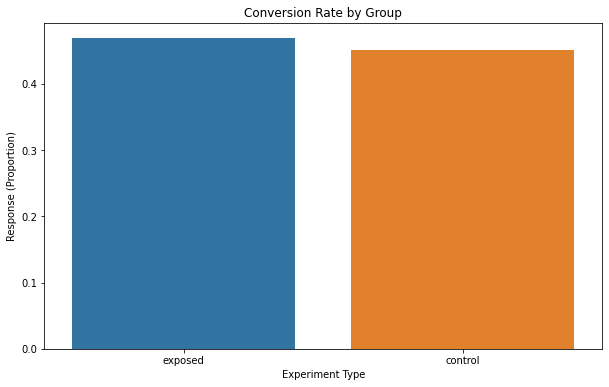

In [66]:
#plotting controlled and exposed agasist response
draw.modified_bar_plot(combined_df, 'experiment', 'response','Conversion Rate by Group')

# Testing the Hypothesis

In [107]:
## as seen from the graph above showing the smart Ad to the treatment havent bring that much change in awareness of the lux brand
#defining both exposed groups
from classic_ab import classics
control_results = classics.get_group_result(combined_df, from_column='experiment', val_type='control',value_column='response')
exposed_results = classics.get_group_result(combined_df, from_column='experiment', val_type='exposed',value_column='response')